<a href="https://colab.research.google.com/github/vkurpmax/Manipulator-Robot/blob/main/Test/Bounding_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [8]:
! python --version

Python 3.10.11


In [9]:
import torch
print(torch.__version__)

2.0.0+cu118


In [10]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 26.2 MB/s eta 0:00:00


In [14]:
import cv2 as cv
from google.colab.patches import cv2_imshow

def get_color(type):
    if(type == 0):
      return (255, 0, 0)
    elif(type == 1):
      return (0, 255, 0)
    elif(type == 2):
      return (0, 0, 255)
    elif(type == 3):
      return (0, 255, 255)

def get_point(x, y, w, h):
  return ((x, y), (x + w, y + h))

def draw_bounding_box(img, data):
  type, x, y, w, h = data
  start_point, end_point = get_point(x, y, w, h)
  cv.rectangle(img, start_point, end_point, get_color(type), 2)

NAME = "img0001" # change to img0002 and img0003

img = cv.imread(f"{NAME}.png")

with open(f"{NAME}.txt") as f:
    lines = f.readlines()
    for line in lines:
      datas = [int(data) for data in line.split(" ")]
      draw_bounding_box(img, datas)

cv2_imshow(img)
cv.imwrite(f"{NAME}_output.png", img)

cv.waitKey(0)
cv.destroyAllWindows()

ValueError: ignored

In [15]:
import cv2
import matplotlib.pyplot as plt

In [16]:
image = cv2.imread('img0001.png')

In [17]:
image_height, image_width, _ = image.shape

In [18]:
with open('img0001.txt', 'r') as file:
    annotations = file.readlines()

0
190
292
333
404
1
220
0
901
712


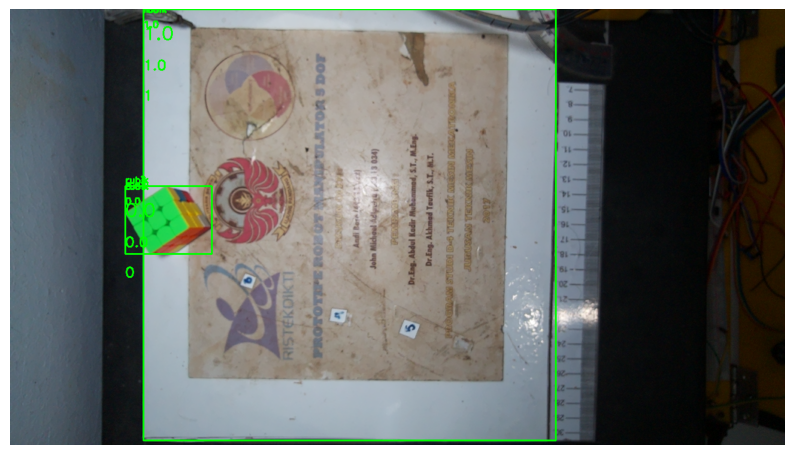

In [36]:
for annotation in annotations:
    label, x_norm, y_norm, width_norm, height_norm = map(float, annotation.strip().split())

    # Convert normalized coordinates to pixel values
    x = int(x_norm * image_width)
    y = int(y_norm * image_height)
    width = int(width_norm * image_width)
    height = int(height_norm * image_height)

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x_min = int(x - width / 2)
    y_min = int(y - height / 2)
    x_max = int(x + width / 2)
    y_max = int(y + height / 2)

    print(int(label))
    print(x_min)
    print(y_min)
    print(x_max)
    print(y_max)
    
    # Draw the bounding box rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Put the class label text near the bounding box
    label = str(int(label))
    cv2.putText(image, label, (x_min, y_min + 150), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [30]:
print(x_min)
print(y_min)
print(x_max)
print(y_max)

220
0
901
712


In [24]:
y_min

0